# **Importing Library**

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# **Importing Dataset**

first we need to understand our data

let's take a look our dataset

In [152]:
df = pd.read_csv('/Users/irgyaarnezzi/Desktop/Diabetes Prediction/data/diabetes.csv')

In [153]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [155]:
df.shape

(768, 9)

In [156]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Dataset Details**

This dataset has 768 rows and 9 columns. the columns include Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome

**Description Columns Dataset**

* Pregnancies: To express the Number of pregnancies
* Glucose: To express the Glucose level in blood
* BloodPressure: To express the Blood pressure measurement
* SkinThickness: To express the thickness of the skin
* Insulin: To express the Insulin level in blood
* BMI: To express the Body mass index
* DiabetesPedigreeFunction: To express the Diabetes percentage
* Age: To express the age
* Outcome: To express the final result 1 is Yes and 0 is No

# **Preprocessing And Data Cleaning**

Handling NaN value

let's check for null values

In [157]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Looks like we don't have null value. Great!

How about duplicated values?

In [158]:
df.duplicated().sum()

0

Wow, we don't have duplicated values either. that's Good!

next we will check for zero values in our dataset

we want to check if there are zero values in some columns that should not have zero, such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI.


In [159]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[columns_to_check] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

it turns out that we have zero values that the columns should not have

In [160]:
df[(df[columns_to_check] == 0).any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


fills the zero value with the mean

In [161]:
columns_with_zeros = columns_to_check.copy()
for column in columns_with_zeros:
    df[column].replace(0, df[column].mean(), inplace=True)

/var/folders/vc/b9vwsv0n3fgchjl0lvbcyn5m0000gn/T/ipykernel_44123/905110474.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].replace(0, df[column].mean(), inplace=True)


In [162]:
(df[columns_to_check] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [163]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


create a new category column to group ages

In [164]:
# Tentukan rentang usia
bins = [0, 20, 35, 50, 100]
labels_age = ['Teen', 'Young adult', 'Adult', 'Senior']

#Buat kolom baru untuk kelompok usia
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels_age, right=False)

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1,Senior
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0,Young adult
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1,Young adult
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0,Young adult
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1,Young adult
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0,Young adult
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1,Young adult
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0,Young adult
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1,Senior
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1,Senior


we have grouped the data by age with the following conditions:

* Teen: 0-20 years old
* Young Adult: 21-35 years old
* Adult: 36-50 years old
* Senior: 51 years old and above

Checking For Outliers

Text(0, 0.5, 'Values')

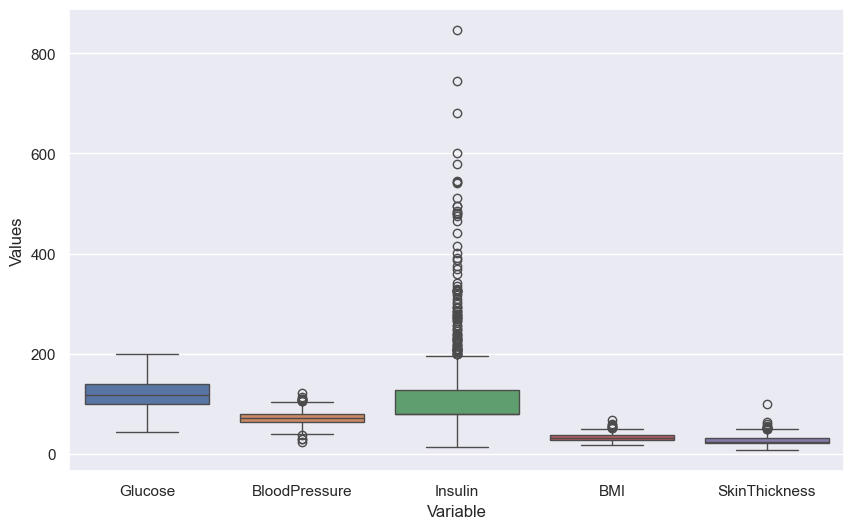

In [165]:
plt.figure(figsize = (10, 6))
sns.boxplot(data=df[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'SkinThickness']])
plt.xlabel('Variable')
plt.ylabel('Values')

Cleaning Outliers using IQR Method

In [166]:
def remove_outlier(df, cleaning_col):
    # Menghitung Q1 dan Q3 untuk setiap kolom
    Q1 = df[cleaning_col].quantile(0.25)
    Q3 = df[cleaning_col].quantile(0.75)
    IQR = Q3 - Q1

    # Menghapus outlier
    df_clean = df[~((df[cleaning_col] < (Q1 - 1.5 * IQR)) | (df[cleaning_col] > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df_clean

# Menggunakan fungsi remove_outlier
cleaning_col = ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'SkinThickness']
df_clean = remove_outlier(df, cleaning_col)

# Mengecek ukuran data setelah menghapus outlier
print(df_clean.shape)




(655, 10)


In [167]:
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,Senior
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,Young adult
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,Young adult
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Young adult
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Young adult


Text(0, 0.5, 'Values')

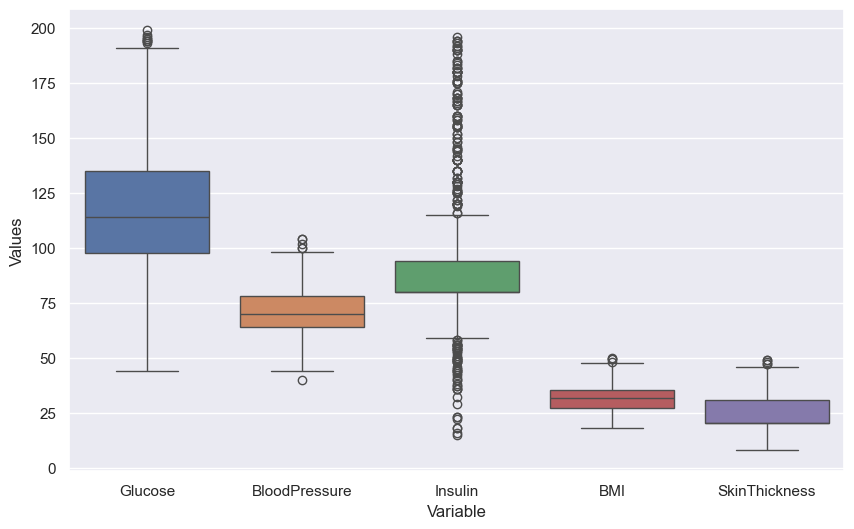

In [168]:
plt.figure(figsize = (10, 6))
sns.boxplot(data=df_clean[['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'SkinThickness']])
plt.xlabel('Variable')
plt.ylabel('Values')

In [170]:
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,Senior
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,Young adult
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,Young adult
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,Young adult
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,Young adult


In [173]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 655 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               655 non-null    int64   
 1   Glucose                   655 non-null    float64 
 2   BloodPressure             655 non-null    float64 
 3   SkinThickness             655 non-null    float64 
 4   Insulin                   655 non-null    float64 
 5   BMI                       655 non-null    float64 
 6   DiabetesPedigreeFunction  655 non-null    float64 
 7   Age                       655 non-null    int64   
 8   Outcome                   655 non-null    int64   
 9   AgeGroup                  655 non-null    category
dtypes: category(1), float64(6), int64(3)
memory usage: 52.0 KB


In [174]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,655.0,3.870229,3.349191,0.000,1.000000,3.000000,6.000,17.000
Glucose,655.0,118.003775,28.715090,44.000,97.500000,114.000000,135.000,199.000
BloodPressure,655.0,71.684864,11.006796,40.000,64.000000,70.000000,78.000,104.000
SkinThickness,655.0,25.278713,8.174057,8.000,20.536458,20.536458,31.000,49.000
Insulin,655.0,91.934673,33.994215,15.000,79.799479,79.799479,94.000,196.000
BMI,655.0,31.598349,6.244659,18.200,27.050000,31.600000,35.450,50.000
DiabetesPedigreeFunction,655.0,0.454487,0.311791,0.078,0.238000,0.351000,0.599,2.288
Age,655.0,33.152672,11.742050,21.000,24.000000,29.000000,41.000,81.000
Outcome,655.0,0.323664,0.468231,0.000,0.000000,0.000000,1.000,1.000


# **Exploratory Data Analysis**

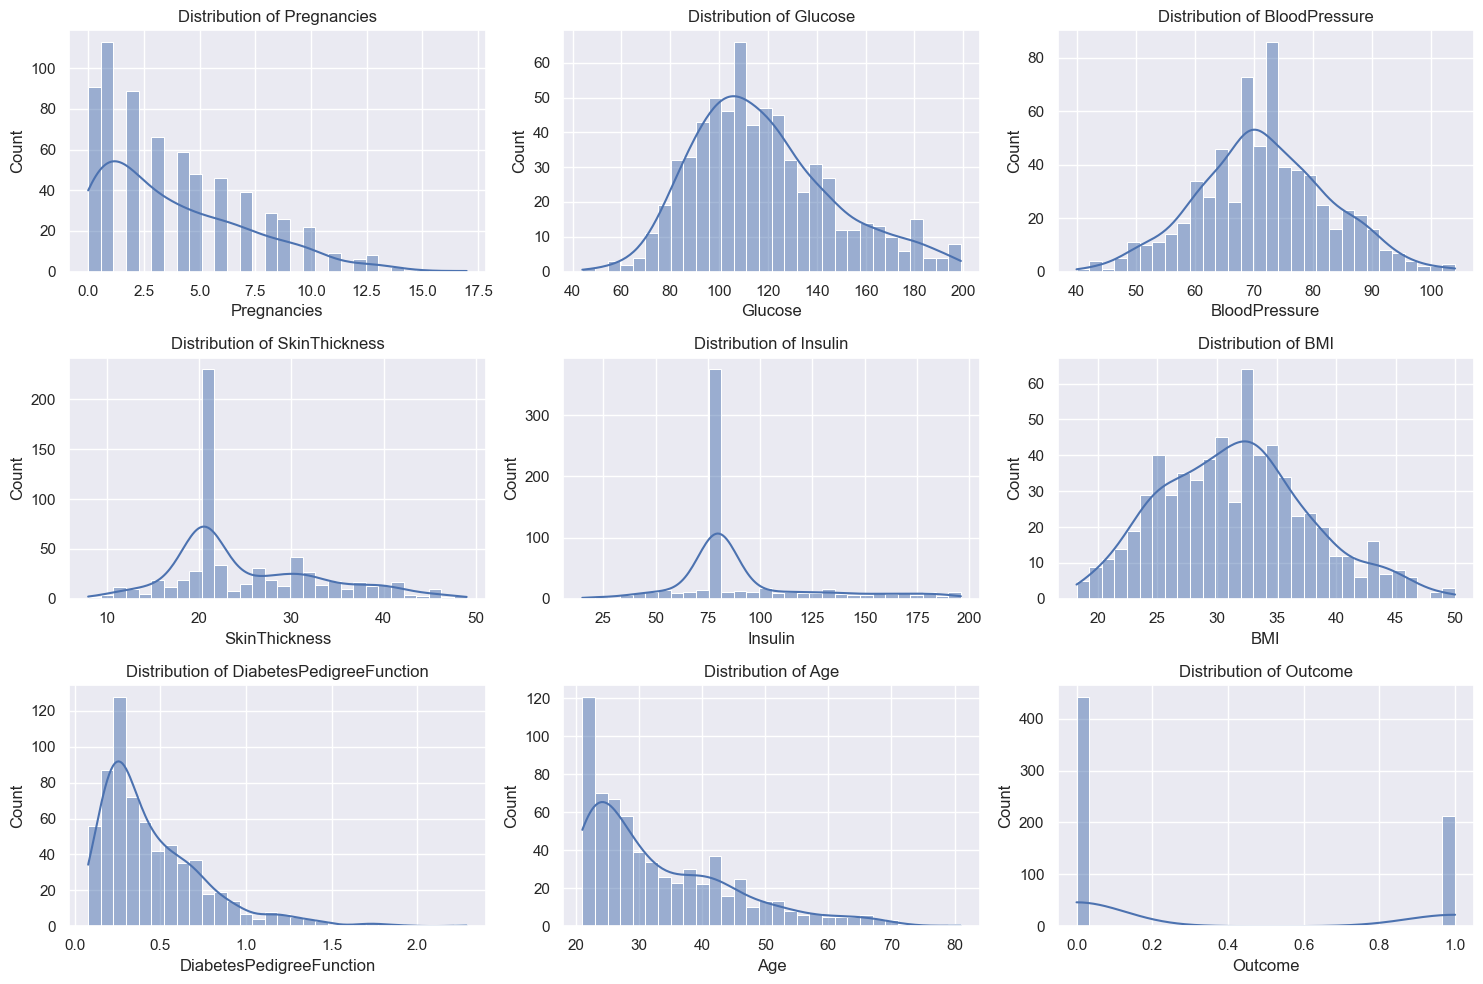

In [175]:
# Visualisasi distribusi dari beberapa fitur
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_clean.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_clean[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Visualizing the distribution helps us understand the distribution of each feature. We use histograms and kernel density estimation (KDE) to give a finer picture of the distribution of values. Look at the distribution of values in each column to detect potential outliers and anomalies.

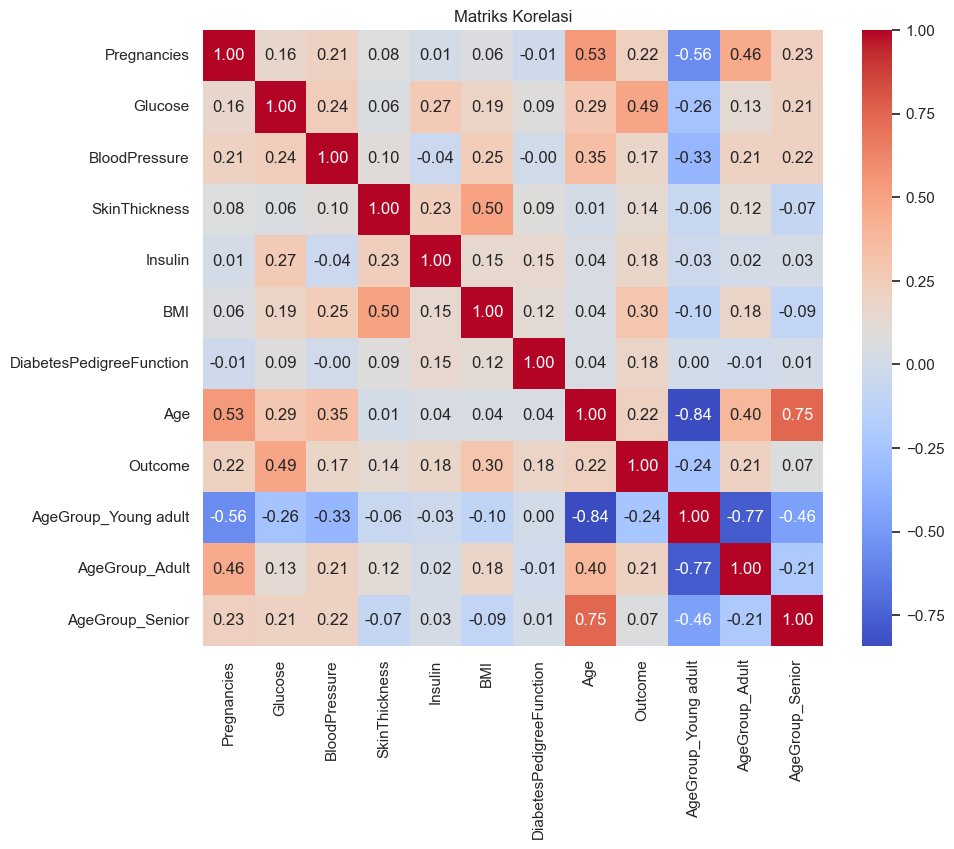

In [179]:
# Jika Anda memiliki kolom kategorikal, konversikan ke dummy variables
df_dummies = pd.get_dummies(df_clean, drop_first=True)

# Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = df_dummies.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi')
plt.show()

In [180]:
new_df = df_clean.copy()

In [181]:
new_df = new_df.drop(columns=['AgeGroup'])

In [182]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [183]:
new_df.to_csv('new_df.csv', index=False)